# 

In [1]:
!pip install pillow chromedriver_py

In [2]:
from selenium import webdriver
from PIL import Image
from selenium.webdriver.common.by import By
from IPython.display import Image as IPImage, display
from chromedriver_py import binary_path
import time
import tempfile

In [3]:


# Set the path to your webdriver executable (e.g., chromedriver or geckodriver)
# Download the appropriate driver for your browser and specify its location here.

# Initialize a headless Chrome browser
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run headless (no GUI)
options.add_argument('--start-maximized')  # Maximize window size

driver = webdriver.Chrome(options=options)

# Open Google.com
driver.get("https://www.google.com")



In [4]:
# Close the cookie bar if it's present (you need to inspect the cookie bar element and use the appropriate selector)
# driver.find_element(By.XPATH, 'button:contains("Odmítnout vše")').click()
# time.sleep()
def deny_cookie_bar():
    js_script = '''
        var elements = document.querySelectorAll('button');
        for (var i = 0; i < elements.length; i++) {
            if (elements[i].textContent.trim() === "Odmítnout vše" || elements[i].textContent.trim() === "reject") {
                elements[i].click();
                break;
            }
        }
        '''
    driver.execute_script(js_script)

In [5]:
urls = [
    "https://google.com",
    "https://duckduckgo.com",
    "https://seznam.cz",
]
image_paths = []
for path in urls:
    tempf = tempfile.NamedTemporaryFile(suffix='.png', delete=True)
    driver.get(path)
    deny_cookie_bar()
    driver.save_screenshot(tempf.name)
    width, height = 720, 480
    image = Image.open(tempf)
    image = image.resize((width, height))
    
    # Save the resized image
    path = path.split("//")[-1] + ".png"
    image.save(path)
    image_paths.append(path)


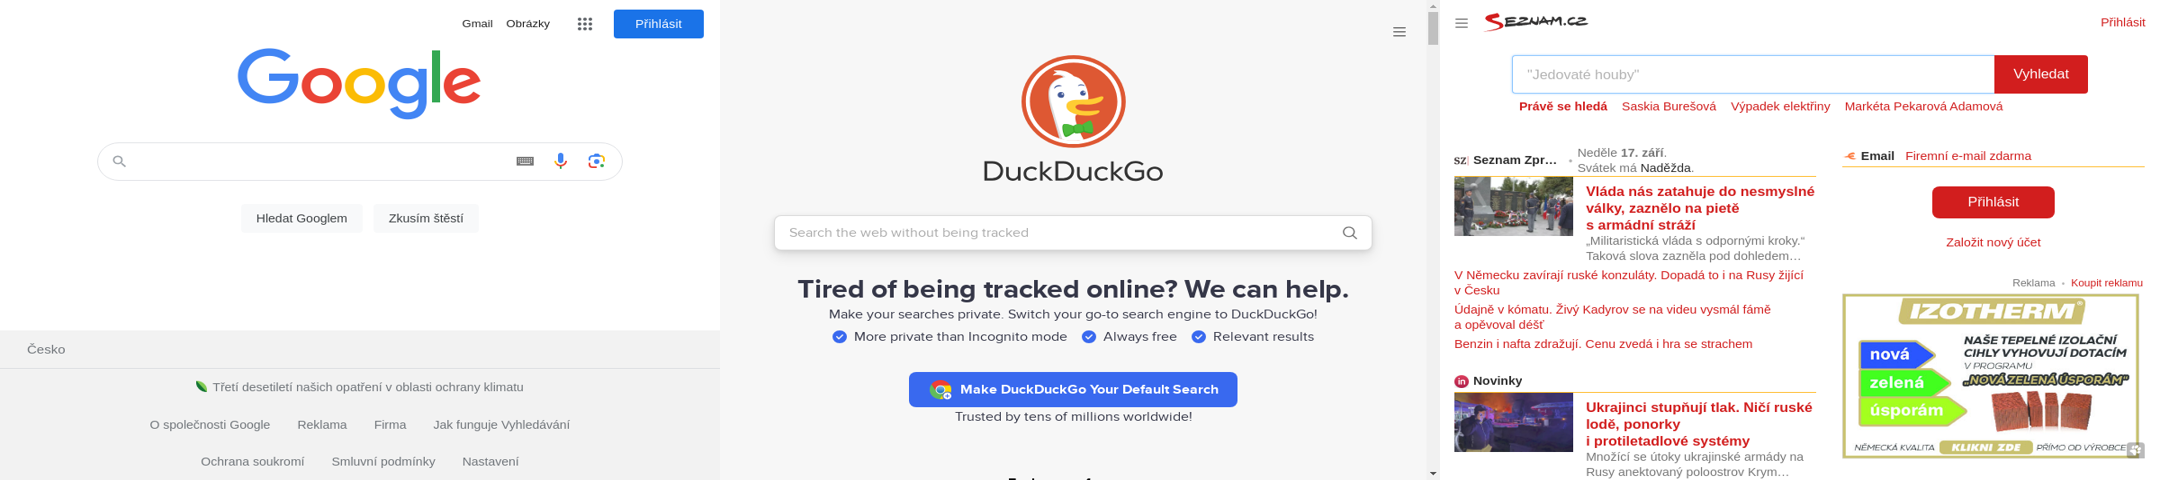

In [6]:
# paths = [resized_google_path, resized_amazon_path, resized_ebay_path]
combined_image = Image.new('RGB', (width * len(image_paths), height))
for k, v in enumerate(image_paths):
    image = Image.open(v)
    image = image.convert('RGB')
    combined_image.paste(image, (k*width, 0))
display(combined_image)

In [7]:
# Close the browser
driver.quit()